<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/07_convolucoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceito Introdutório de Convolução

## Calculando uma convolução

In [ ]:
import torch
import torch.nn as nn

import torch.nn.functional as F

In [ ]:
x = torch.randint(1,100,(10,10)).float().unsqueeze(0).unsqueeze(0)
x

tensor([[[[35., 73., 20., 46., 89., 73., 74.,  5., 70., 83.],
          [35., 50., 72., 25., 32., 16., 48., 85., 61., 26.],
          [98., 49., 46., 76., 32., 79., 52., 34.,  2., 10.],
          [53., 53., 28., 68., 78., 34., 23., 97., 51., 26.],
          [28., 52., 23.,  5., 66., 98., 54., 75., 65., 59.],
          [30., 71., 25., 92., 47., 44., 88., 71., 58., 98.],
          [ 5.,  8., 77., 63., 22., 55., 58., 68., 92., 72.],
          [79., 90., 55., 75., 99., 77., 65., 73., 22., 98.],
          [42., 38., 67., 53., 41.,  3., 78., 60.,  8., 53.],
          [54., 82., 73., 65., 26., 60., 79., 11., 60., 93.]]]])

In [ ]:
# (batch_size, canais, largura, comprimento)
x.shape

torch.Size([1, 1, 10, 10])

In [ ]:
kernel  = torch.tensor([[-1,-1,-1],
                        [-1, 8,-1],
                        [-1,-1,-1]]).float().unsqueeze(0).unsqueeze(0)

In [ ]:
#[batch_size, channels, height, width]
x.shape,kernel.shape

(torch.Size([1, 1, 10, 10]), torch.Size([1, 1, 3, 3]))

In [ ]:
F.conv2d(x,kernel)

tensor([[[[ -28.,  191., -213., -180., -351.,  -34.,  334.,  173.],
          [ -43.,  -53.,  227., -152.,  317.,    0., -147., -374.],
          [  47., -148.,  190.,  166., -210., -339.,  420.,   40.],
          [ 105., -210., -387.,   62.,  350.,  -98.,   93.,  -15.],
          [ 320., -191.,  408.,  -69., -136.,  181.,   10., -136.],
          [-368.,  137.,   12., -376.,  -60.,  -77.,   17.,  176.],
          [ 349.,  -31.,  123.,  403.,  195.,   48.,  133., -348.],
          [-238.,    5.,  -77., -130., -501.,  196.,   84., -406.]]]])

In [ ]:
nn.Conv2d?

In [ ]:
# utilizando um a convolução de uma camada

f1 = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,bias=False)

In [ ]:
#nn.Conv2d??

In [ ]:
f1.weight


Parameter containing:
tensor([[[[-0.0497, -0.1149,  0.1774],
          [ 0.0393,  0.1538,  0.2980],
          [ 0.0143,  0.1438,  0.0603]]]], requires_grad=True)

In [ ]:
f1.weight.shape

torch.Size([1, 1, 3, 3])

In [ ]:
n1=f1(x)

RuntimeError: ignored

In [ ]:
n1.shape

torch.Size([1, 2, 8, 8])

## Detector de Bordas

In [ ]:
xb = torch.zeros((6,6))

In [ ]:
xb[:,[0,1,2]] = 50

In [ ]:
kernel  = torch.tensor([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]]).float().unsqueeze(0).unsqueeze(0)

In [ ]:
xb

tensor([[50., 50., 50.,  0.,  0.,  0.],
        [50., 50., 50.,  0.,  0.,  0.],
        [50., 50., 50.,  0.,  0.,  0.],
        [50., 50., 50.,  0.,  0.,  0.],
        [50., 50., 50.,  0.,  0.,  0.],
        [50., 50., 50.,  0.,  0.,  0.]])

In [ ]:
F.conv2d(xb.unsqueeze(0).unsqueeze(0),kernel)

tensor([[[[  0., 150., 150.,   0.],
          [  0., 150., 150.,   0.],
          [  0., 150., 150.,   0.],
          [  0., 150., 150.,   0.]]]])

## Exercício 1: Baixe uma imagem da internet e aplique os filtros de convolução de Scharr

In [ ]:
from PIL import Image
import requests
from io import BytesIO
url = "https://cdn.shopify.com/s/files/1/0043/8471/8938/products/155674468194515645.jpg?v=1556744714"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

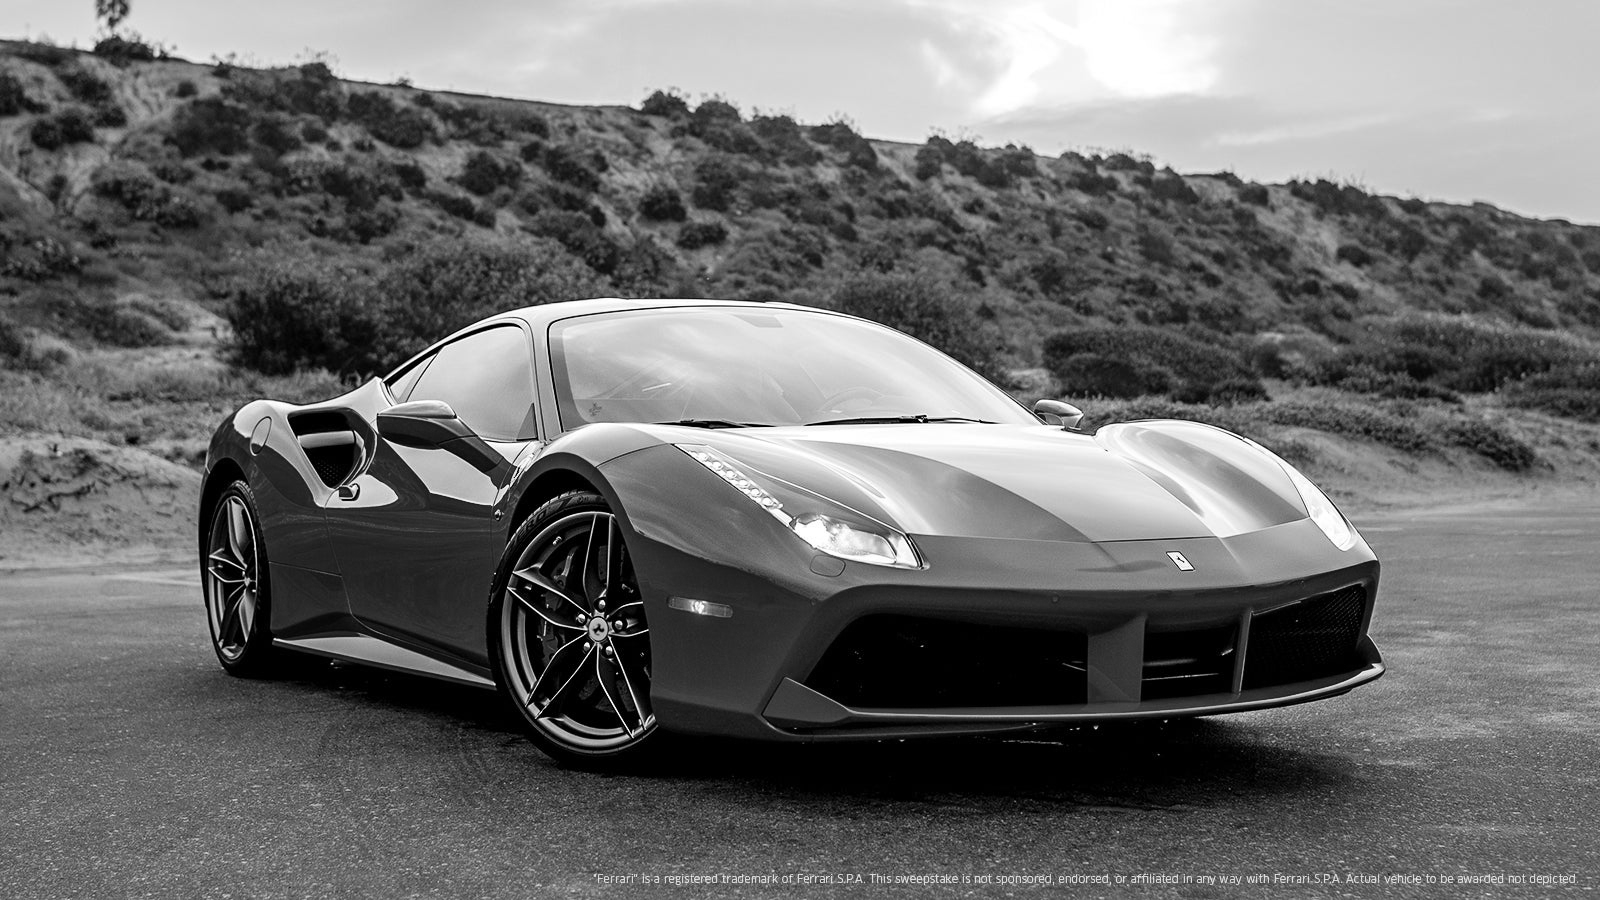

In [ ]:
img

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

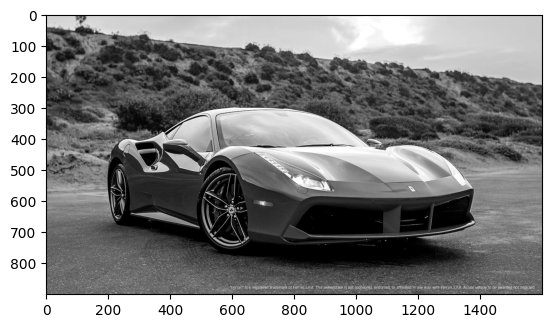

In [ ]:
aimg = np.asarray(img)
plt.imshow(aimg,cmap='gray')

In [ ]:
x = torch.tensor(aimg)

In [ ]:
xres = f1(x.float().unsqueeze(0).unsqueeze(0))

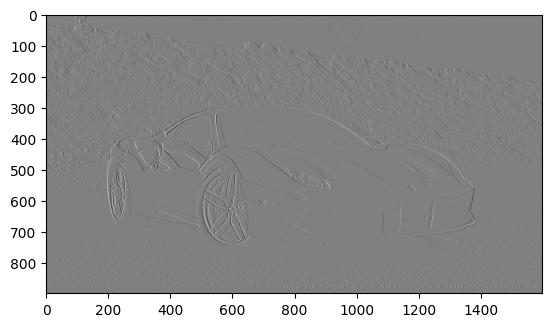

In [ ]:
plt.imshow(xres[0,0].detach().numpy(),cmap='gray')

In [ ]:
f1.weight[0,0].__class__

torch.Tensor

In [ ]:
f1.weight[0,0].shape

torch.Size([3, 3])

In [ ]:
f1.weight = torch.nn.Parameter(torch.tensor([[0,0,3],
                                             [0,3,0],
                                             [3,0,0]]).float().unsqueeze(0).unsqueeze(0))

In [ ]:
xres = f1(x.float().unsqueeze(0).unsqueeze(0))

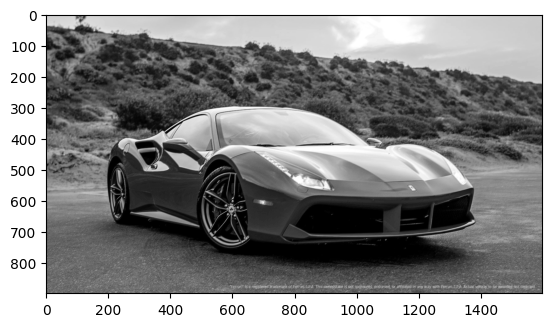

In [ ]:
plt.imshow(xres[0,0].detach().numpy(),cmap='gray')

## Exercício 2: Construa uma rede convolucional com pelo menos 4 camadas


### Montando o google drive

### Preparando o Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize([0,0,0],[1,1,1])])

In [ ]:
imgfolder = torchvision.datasets.ImageFolder("downloads",transform=transform)
len(imgfolder)

327

In [ ]:
imgfolder[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
train,val = torch.utils.data.random_split(imgfolder,(227,100))

In [ ]:
dl = torch.utils.data.DataLoader(train,batch_size=64,shuffle=True)
dlval = torch.utils.data.DataLoader(val,batch_size=20,shuffle=True)

In [ ]:
x,y = next(iter(dl))


In [ ]:
x.shape

torch.Size([30, 3, 32, 32])

In [ ]:
x=x.permute(0,2,3,1)
x.shape

torch.Size([30, 32, 32, 3])

In [ ]:
import matplotlib.pyplot as plt

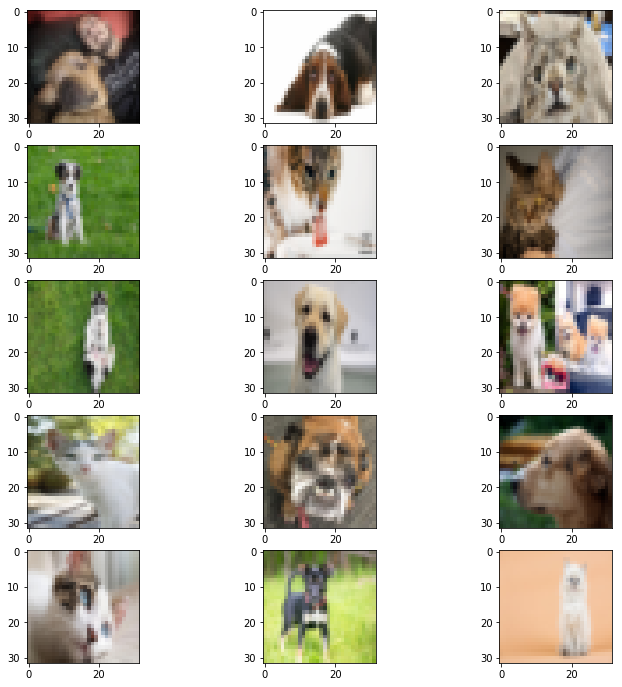

In [ ]:
_,axs = plt.subplots(5,3,figsize=(12,12))
axs = axs.flatten()
for img,vclass,ax in zip(x,y,axs):
    ax.imshow(img)

### Treinamento do Modelo

In [ ]:
import torch.optim as optim
import torch.nn.functional as F


In [ ]:
class FirstModel(nn.Module):
    def __init__(self):
        super(FirstModel,self).__init__()
        # defina seu modelo AQUI
    def forward(self,x):
        # implemente o forward
        return x


In [ ]:
def acc(pred,y):
    return (pred.argmax(dim=1) == y).float().mean()

In [ ]:
model = FirstModel()

In [ ]:
# Execute aqui seu código de treinamento